In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# !git clone https://github.com/hyeshik/colab-biolab.git
# !cd colab-biolab && bash tools/setup.sh
# exec(open('colab-biolab/tools/activate_conda.py').read())

In [37]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [38]:
# !conda install -y subread
# !ls
# !pwd
# !featureCounts -h
# !featureCounts -a gencode.gtf  -o /content/drive/MyDrive/YOA/read-counts.txt  CLIP-35L33G.bam	 RNA-control.bam		RNA-siLin28a.bam	RNA-siLuc.bam RPF-siLin28a.bam RPF-siLuc.bam

In [39]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)

In [40]:
import numpy as np
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

cnts['clip_enrichment_log2'] = np.log2(cnts['clip_enrichment'])
cnts['rden_change_log2'] = np.log2(cnts['rden_change'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change,clip_enrichment_log2,rden_change_log2
Geneid,,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN,2.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN,NaN,NaN


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


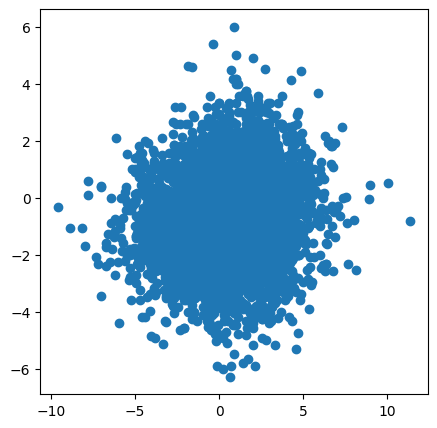

In [42]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

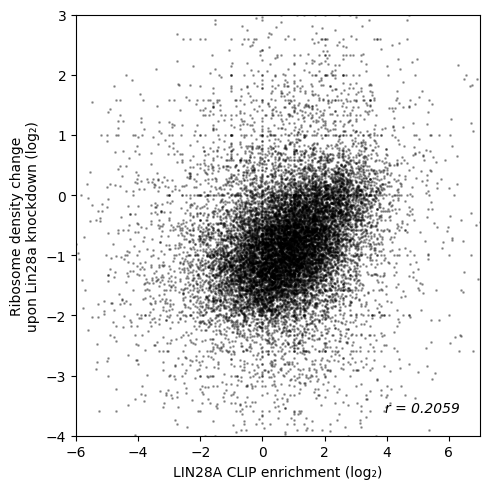

In [43]:
from scipy.stats import pearsonr

mask_valid = (cnts['clip_enrichment'] > 0) & (cnts['rden_change'] > 0)
x = np.log2(cnts.loc[mask_valid, 'clip_enrichment'])
y = np.log2(cnts.loc[mask_valid, 'rden_change'])

valid = ~(np.isinf(x) | np.isinf(y))
x = x[valid]
y = y[valid]

r, _ = pearsonr(x, y)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y, s=1, alpha=0.3, color='black')

ax.set_xlabel('LIN28A CLIP enrichment (log₂)')
ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
ax.set_xlim(-6, 7)
ax.set_ylim(-4, 3)

ax.text(0.95, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='right', va='bottom', fontsize=10, style='italic')

plt.tight_layout()
plt.show()


In [44]:
# x = cnts['clip_enrichment_log2']
# y = cnts['rden_change_log2']

# # NaN 또는 Inf가 있는 row 제거
# mask = (~x.isna()) & (~y.isna()) & np.isfinite(x) & np.isfinite(y)
# x_clean = x[mask]
# y_clean = y[mask]

# # Pearson correlation 계산
# r, p = pearsonr(x_clean, y_clean)
# print(f"Pearson r = {r:.4f}, p = {p:.4e}")


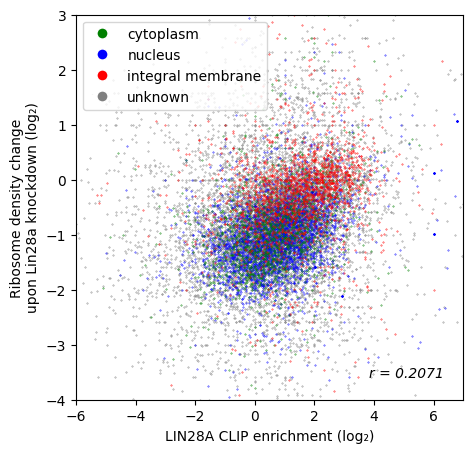

In [45]:
import matplotlib.patches as mpatches
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.rename(columns={'gene_id': 'Geneid'}, inplace=True)

# cnts_df = cnts

cnts = cnts.replace([np.inf, -np.inf], np.nan).dropna(subset=['clip_enrichment_log2', 'rden_change_log2'])
cnts.reset_index(inplace=True)
cnts['Geneid'] = cnts['Geneid'].str.split('.').str[0]
# cnts.head()
# mouselocal.head()
cnts_local = cnts.merge(mouselocal, how = 'left', on = 'Geneid')
# cnts_local.head()

cnts_local['type'] = cnts_local['type'].fillna('unknown')
colors = {'cytoplasm': 'green', 'nucleus': 'blue', 'integral membrane': 'red', 'unknown': 'gray'}

r, _ = pearsonr(cnts_local['clip_enrichment_log2'], cnts_local['rden_change_log2'])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for t in cnts_local['type'].unique():
    df_subset = cnts_local[cnts_local['type'] == t]
    ax.scatter(df_subset['clip_enrichment_log2'], df_subset['rden_change_log2'],
                color=colors[t], label=t, alpha=1, s = 0.1)

ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log₂)')

ax.text(0.95, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='right', va='bottom', fontsize=10, style='italic')
ax.set_xlim(-6, 7)
ax.set_ylim(-4, 3)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=color)
                  for label, color in colors.items()]
ax.legend(handles=legend_handles)

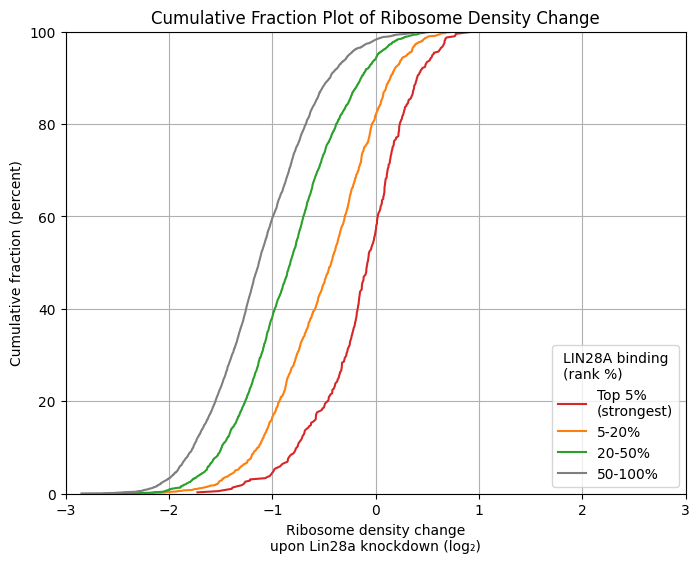

In [46]:

cnts_2 = cnts[(cnts['RNA-control.bam'] >= 30) & (cnts['RNA-siLuc.bam'] >= 80) & (cnts['RPF-siLuc.bam'] >= 80)]

cnts_2 = cnts_2.replace([np.inf, -np.inf], np.nan).dropna(subset=['clip_enrichment_log2', 'rden_change_log2'])
cnts_2['rank'] = cnts_2['clip_enrichment'].rank(ascending=False)
thrlist = [0.05, 0.20, 0.50, 1.00]
grouplist = ['Top 5%\n(strongest)', '5-20%', '20-50%', '50-100%']
perce = [cnts_2['rank'].quantile(q) for q in thrlist]
# for i in perce :
#   print(i)
cnts_2['group'] = pd.cut(cnts_2['rank'], bins=[0] + perce, labels=grouplist)

colormap = {
    'Top 5%\n(strongest)': '#d62728',
    '5-20%': '#ff7f0e',
    '20-50%': '#2ca02c',
    '50-100%': '#7f7f7f'
}

plt.figure(figsize=(8, 6))

for group in grouplist:
    datadata = cnts_2[cnts_2['group'] == group]['rden_change_log2'].sort_values()
    cumfrac = np.arange(1, len(datadata) + 1)* 100  / len(datadata)
    plt.plot(datadata,
             cumfrac,
             label=group,
             color=colormap[group])
    # plt.scatter(datadata,
    #             cumfrac,
    #             color=colormap[group],
    #             label=None)
plt.xlim(-3, 3)
plt.ylim(0, 100)
plt.xlabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
plt.ylabel('Cumulative fraction (percent)')
plt.legend(title='LIN28A binding\n(rank %)', loc='lower right')
plt.title('Cumulative Fraction Plot of Ribosome Density Change')
plt.grid(True)
plt.show()

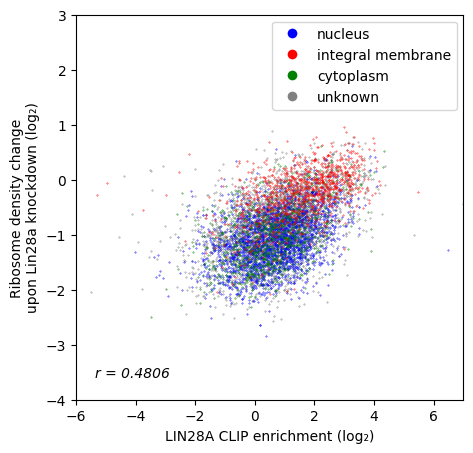

In [47]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import ssl


ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log2)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log2)')

ax.text(6.5,-2.95, f'r = {r:.4f}',
        fontsize=8, ha='right', va='bottom')
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.rename(columns={'gene_id': 'Geneid'}, inplace=True)

cnts_df = cnts_2
r, p_value = pearsonr(cnts_df['clip_enrichment_log2'], cnts_df['rden_change_log2'])

cnts_df['Geneid'] = cnts_df['Geneid'].str.split('.').str[0]
cnts_df = cnts_df.merge(mouselocal, how = 'left', on = 'Geneid')
cnts_df['type'] = cnts_df['type'].fillna('unknown')
cnts_df.head()
colors = {'nucleus': 'blue', 'integral membrane': 'red', 'cytoplasm': 'green', 'unknown': 'gray'}
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for t in cnts_df['type'].unique():
    df_subset = cnts_df[cnts_df['type'] == t]
    ax.scatter(df_subset['clip_enrichment_log2'], df_subset['rden_change_log2'],
                color=colors[t], label=t, alpha=1, s = 0.1)

ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log₂)')

ax.text(0.05, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='left', va='bottom', fontsize=10, style='italic')
# ax.set_xlim(-4, 6)
# ax.set_ylim(-3, 1)
ax.set_xlim(-6, 7)
ax.set_ylim(-4, 3)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=color)
                  for label, color in colors.items()]
ax.legend(handles=legend_handles)

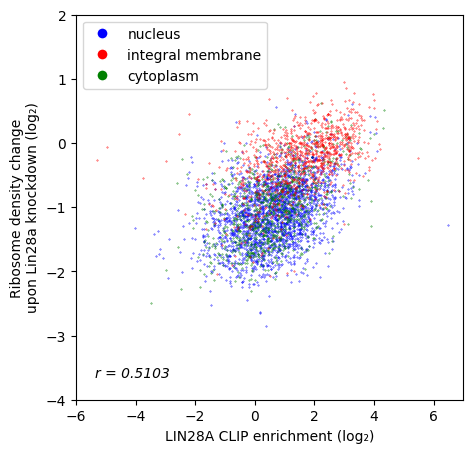

In [48]:
# Figure S6

from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import ssl


ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log2)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log2)')

ax.text(6.5,-2.95, f'r = {r:.4f}',
        fontsize=8, ha='right', va='bottom')
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.rename(columns={'gene_id': 'Geneid'}, inplace=True)

cnts_df2 = cnts_2

cnts_df2['Geneid'] = cnts_df2['Geneid'].str.split('.').str[0]
cnts_df2 = cnts_df2.merge(mouselocal, how = 'left', on = 'Geneid')
cnts_df2['type'] = cnts_df2['type'].fillna('unknown')
cnts_df = cnts_df2[cnts_df2['type'] != 'unknown']
r, p_value = pearsonr(cnts_df['clip_enrichment_log2'], cnts_df['rden_change_log2'])

colors = {'nucleus': 'blue', 'integral membrane': 'red', 'cytoplasm': 'green'}
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for t in cnts_df['type'].unique():
    df_subset = cnts_df[cnts_df['type'] == t]
    ax.scatter(df_subset['clip_enrichment_log2'], df_subset['rden_change_log2'],
                color=colors[t], label=t, alpha=1, s = 0.1)

ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log₂)')
ax.set_xlabel(r'LIN28A CLIP enrichment (log₂)')

ax.text(0.05, 0.05, f'r = {r:.4f}', transform=ax.transAxes,
        ha='left', va='bottom', fontsize=10, style='italic')
# ax.set_xlim(-4, 6)
# ax.set_ylim(-3, 1)
ax.set_xlim(-6, 7)
ax.set_ylim(-4, 2)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=8, markerfacecolor=color)
                  for label, color in colors.items()]
ax.legend(handles=legend_handles)

In [49]:
# !wget http://current.geneontology.org/annotations/mgi.gaf.gz
# !gunzip mgi.gaf.gz
#!wget http://www.informatics.jax.org/downloads/reports/MGI_EntrezGene.rpt
# !head MGI_EntrezGene.rpt
# !cut -f1,2 MGI_EntrezGene.rpt | grep "ENSMUS" | awk '{print $1"\t"$2}' > mgi_ensmus
# !awk -F"\t" 'FNR==NR{name[$1]=$2; next}{if($2 in name){print name[$2]"\t"$5}}' mgi_ensmus mgi.gaf > go_ensembl

In [54]:
!pip install biomart

In [55]:
from biomart import BiomartServer
import pandas as pd
from io import StringIO

# Ensembl BioMart 서버 접속
server = BiomartServer("http://www.ensembl.org/biomart")
dataset = server.datasets['mmusculus_gene_ensembl']

# 검색 쿼리
response = dataset.search({
    'attributes': [
        'ensembl_gene_id',  # ENSMUSGxxxxx
        'go_id',            # GO:xxxxxxx
        'name_1006',        # GO term 이름
        'namespace_1003'    # biological_process 등
    ]
})

# 텍스트로 변환 후 DataFrame 처리



In [56]:
df_go = pd.read_csv(StringIO(response.text), sep='\t', header=None,
                    names=['Geneid', 'GO', 'GO_name', 'GO_domain'])

# NaN 제거
df_go = df_go[df_go['GO'].notna()]

In [ ]:
# df_go.head()
# # len(df_go)

In [57]:
cnts_go = cnts_local.merge(df_go, how = 'left', on = 'Geneid')
cnts_go.head()
print(cnts_go.columns)

Index(['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'CLIP-35L33G.bam',
       'RNA-control.bam', 'RNA-siLin28a.bam', 'RNA-siLuc.bam',
       'RPF-siLin28a.bam', 'RPF-siLuc.bam', 'clip_enrichment', 'rden_change',
       'clip_enrichment_log2', 'rden_change_log2', 'Gene names', 'type', 'GO',
       'GO_name', 'GO_domain'],
      dtype='object')


In [58]:
# from scipy.stats import mannwhitneyu
# from statsmodels.stats.multitest import multipletests

# # 필요한 컬럼 필터
# df = cnts_go[['GO_name', 'rden_change_log2', 'clip_enrichment_log2']].dropna()

# # GO term 목록
# terms = df['GO_name'].unique()
# results = []

# for term in terms:
#     group1 = df[df['GO_name'] == term]
#     group2 = df[df['GO_name'] != term]

#     if len(group1) < 5 or len(group2) < 5:
#         continue

#     # Mann-Whitney U test on rden_change_log2
#     stat, pval = mannwhitneyu(group1['rden_change_log2'], group2['rden_change_log2'], alternative='two-sided')

#     results.append({
#         'GO_name': term,
#         'n_genes': len(group1),
#         'pval': pval,
#         'rden_change_log2_mean': group1['rden_change_log2'].mean(),
#         'clip_enrichment_log2_mean': group1['clip_enrichment_log2'].mean()
#     })

# # 데이터프레임으로 정리
# mw_df = pd.DataFrame(results)

# # FDR 보정
# mw_df['fdr'] = multipletests(mw_df['pval'], method='fdr_bh')[1]


In [ ]:
# mw_df.head()

In [59]:
# mw_df_tmp2 = mw_df[mw_df['fdr'] <= 0.05]
# mw_df_tmp = mw_df_tmp2.sort_values('fdr', ascending=False)

In [63]:
# mw_df_tmp.to_csv("mw_df_tmp.tsv", sep='\t', index=False)

In [64]:
!head mw_df_tmp.tsv

GO_name	n_genes	pval	rden_change_log2_mean	clip_enrichment_log2_mean	fdr	point_size
camera-type eye development	45	0.00593583714565151	-0.5295370589051227	1.4690600957279245	0.04998509015830198	94.86832980505137
BMP receptor activity	12	0.005924141132183798	-0.2769815474126736	2.7355090680218113	0.04995910879204999	48.98979485566356
DNA synthesis involved in DNA repair	10	0.005906212668741161	-1.4109359003631294	0.5901497145656555	0.049880416163080366	44.721359549995796
postsynaptic density	212	0.005895576236676426	-0.9735924031957746	0.8183240611626623	0.049863168112531525	205.91260281974
P-type calcium transporter activity	6	0.00583463721382983	-0.09756269569720971	2.671184906391883	0.04945575958393146	34.64101615137754
intermediate filament	38	0.00583888233626216	-1.1104987547039584	0.531434217139469	0.04945575958393146	87.17797887081346
hydrolase activity	751	0.0057750124168249005	-0.8983972322903716	0.7580323737657977	0.04905801177513627	387.556447501522
negative regulation of T c

In [65]:
mw_df_tmp = pd.read_csv("mw_df_tmp.tsv", sep="\t")

In [67]:
# !pip install adjustText

In [87]:
# 기준별 상위 5개 GO term 추출
top_fdr = mw_df_tmp.sort_values('fdr').head(3)['GO_name']
top_clip = mw_df_tmp.sort_values('clip_enrichment_log2_mean', ascending=False).head(3)['GO_name']
top_genecount = mw_df_tmp.sort_values('n_genes', ascending=False).head(3)['GO_name']

# 세 리스트를 합치고 중복 제거
highlight_terms = list(set(top_fdr) | set(top_clip) | set(top_genecount))

print("Highlight terms (총 {}개):".format(len(highlight_terms)))
print(highlight_terms)


Highlight terms (총 9개):
['triplet codon-amino acid adaptor activity', 'protein binding', 'nucleus', 'endoplasmic reticulum', 'mRNA branch site recognition', 'membrane', 'cytoplasm', 'structural constituent of chromatin', 'endoplasmic reticulum membrane']


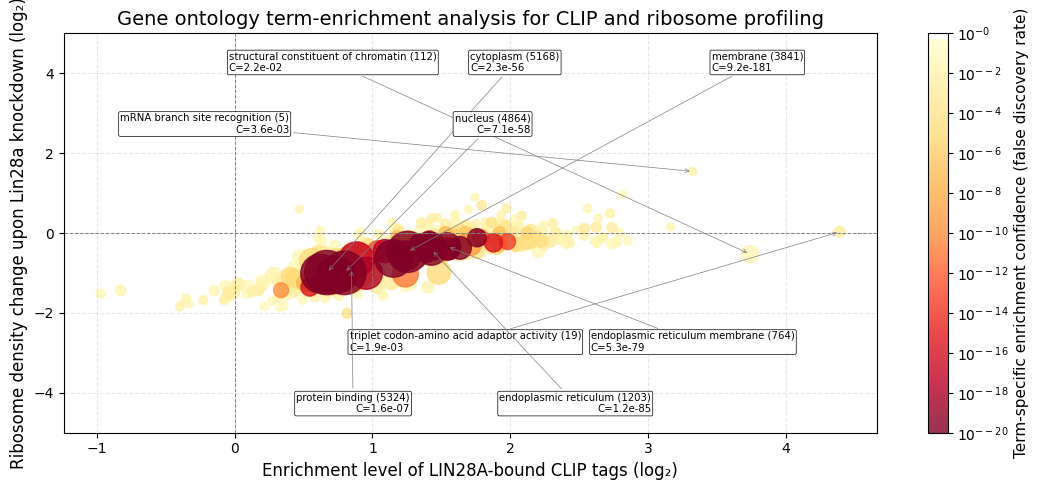

In [101]:
# 큰거, 엄청 빨간거, 아웃라이어 term
from adjustText import adjust_text
from matplotlib.colors import LogNorm
# highlight_terms = [
#     'extracellular region', 'endoplasmic reticulum', 'endoplasmic reticulum membrane',
#     'glycosaminoglycan metabolic process', 'endoplasmic reticulum lumen', 'cell surface',
#     'calcium ion binding', 'Golgi apparatus', 'nucleosome assembly', 'nucleosome',
#     'mitochondrion', 'nucleus', 'cytoplasm'
# ]
highlight_df = mw_df_tmp[mw_df_tmp['GO_name'].isin(highlight_terms)]
mw_df_tmp['point_size'] = (np.sqrt(mw_df_tmp['n_genes']) / np.sqrt(50)) * 100


fig, ax = plt.subplots(figsize=(11, 5))
sc = ax.scatter(
    mw_df_tmp['clip_enrichment_log2_mean'],
    mw_df_tmp['rden_change_log2_mean'],
    s=mw_df_tmp['point_size'],
    c=mw_df_tmp['fdr'],
    cmap='YlOrRd_r',
    norm=LogNorm(vmax=0.5, vmin=1e-20),
    alpha=0.8
)

# ax.set_xlim(-3.5, 4.5)  # 전체 분포 보여주고
# ax.set_ylim(-2.8, 1.0)  # 상위 1% 정도 여유

# ax.set_xlim(-2, 5)
ax.set_ylim(-5, 5)
# label 개수, x좌표 범위
n_labels = len(highlight_df)
xlim = ax.get_xlim()
x_margin = 1.2  # ✅ 간격 더 넓힘

# 좌우로 넓게 퍼뜨리기
x_positions = np.linspace(xlim[0] + x_margin, xlim[1] - x_margin, n_labels)

# y축 범위 안쪽 여유
ylim = ax.get_ylim()
y_padding = 0.2 * (ylim[1] - ylim[0])
y_top1 = ylim[1]- y_padding/2
y_top = ylim[1] - y_padding
y_bottom = ylim[0] + y_padding
y_bottom1 = ylim[0] + y_padding/2
# annotation 반복
for i, (_, row) in enumerate(highlight_df.iterrows()):
    label = f"{row['GO_name']} ({row['n_genes']})\nC={row['fdr']:.1e}"
    if(i%4==0) : y_target = y_top1
    elif (i%4==1) : y_target = y_top
    elif (i%4==2) : y_target = y_bottom
    else : y_target = y_bottom1
    # y_target = y_top if i % 2 == 0 else y_bottom
    x_target = x_positions[i]

    # 가운데 붙이면 겹침 → 좌우 혼용
    halign = 'left' if i % 2 == 0 else 'right'

    ax.annotate(
        label,
        xy=(row['clip_enrichment_log2_mean'], row['rden_change_log2_mean']),
        xytext=(x_target, y_target),
        textcoords='data',
        ha=halign,
        va='bottom' if i % 2 == 0 else 'top',
        fontsize=7.3,
        bbox=dict(boxstyle='round,pad=0.15', fc='white', ec='black', lw=0.5),
        arrowprops=dict(arrowstyle='->', color='gray', lw=0.5)
    )

# # y축 최상단과 최하단 (annotation 위치)
# y_max = ax.get_ylim()[1]
# y_min = ax.get_ylim()[0]

# # 고정된 x축 위치 생성 (좌우로 퍼지게)
# n_labels = len(highlight_df)
# x_positions = np.linspace(ax.get_xlim()[0] + 0.5, ax.get_xlim()[1] - 0.5, n_labels)

# # 번갈아 위/아래로 박스 분배
# for i, (_, row) in enumerate(highlight_df.iterrows()):
#     label = f"{row['GO_name']} ({row['n_genes']})\nC={row['fdr']:.1e}"
#     y_target = y_max if i % 2 == 0 else y_min
#     x_target = x_positions[i]

#     ax.annotate(
#         label,
#         xy=(row['clip_enrichment_log2_mean'], row['rden_change_log2_mean']),
#         xytext=(x_target, y_target),
#         textcoords='data',
#         fontsize=9,
#         ha='center',
#         va='bottom' if i % 2 == 0 else 'top',
#         bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5),
#         arrowprops=dict(arrowstyle='->', lw=0.5, color='gray')
#     )

# texts = []
# for _, row in highlight_df.iterrows():
#     label = f"{row['GO_name']} ({row['n_genes']})\nC={row['fdr']:.1e}"
#     text = ax.annotate(
#         label,
#         xy=(row['clip_enrichment_log2_mean'], row['rden_change_log2_mean']),
#         xytext=(0, 0),  # 시작 위치 (0 offset)
#         textcoords='offset points',
#         fontsize=9,
#         bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5),
#         arrowprops=dict(arrowstyle='->', lw=0.5)
#     )
#     texts.append(text)

# # 자동 위치 조정 (여기서 겹침 최소화)
# adjust_text(texts,
#             only_move={'points': 'y', 'text': 'xy'},  # 세밀한 제어도 가능
#             arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
#             force_text=0.5, force_points=0.3, expand_text=(1.1, 1.2))

# for _, row in highlight_df.iterrows():
#     label = f"{row['GO_name']} ({row['n_genes']})\nC={row['fdr']:.1e}"
#     ax.annotate(
#     label,
#     xy=(row['clip_enrichment_log2_mean'], row['rden_change_log2_mean']),
#     xytext=(10, 10),  # ← 여기 추가!
#     textcoords='offset points',
#     fontsize=9,
#     bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', lw=0.5),
#     arrowprops=dict(arrowstyle='->', lw=0.5)
# )


# 컬러바
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('Term-specific enrichment confidence (false discovery rate)', fontsize=11)
log_ticks = [10**(-i) for i in range(0, 21, 2)]
cbar.set_ticks(log_ticks)
cbar.ax.set_yticklabels([f"$10^{{-{int(np.log10(t))}}}$" for t in log_ticks])

# # 축 및 타이틀
ax.set_xlabel('Enrichment level of LIN28A-bound CLIP tags (log₂)', fontsize=12)
ax.set_ylabel('Ribosome density change upon Lin28a knockdown (log₂)', fontsize=12)
ax.set_title('Gene ontology term-enrichment analysis for CLIP and ribosome profiling', fontsize=14)
ax.axhline(0, linestyle='--', color='gray', linewidth=0.7)
ax.axvline(0, linestyle='--', color='gray', linewidth=0.7)a
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("my_figure.png", dpi=300, bbox_inches='tight')
plt.show()